In [30]:
# Load the packages we will need
# 
from netCDF4 import Dataset
import sklearn.cluster
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [14]:
# Open the Nutrient and plankton dataset
f=Dataset('/nobackup/users/cnh/projects/green-up-iap2020/NPZ.nc')
# Show what there is
f.subtitle

'The surface biomass sum over functional groups (prokaryote, picoeukaryote, coccolithophore, diazotroph, diatom, mixotroph. dinoflag., zooplankton) and surface fluxes of N, Fe, P and Si from DARWIN.'

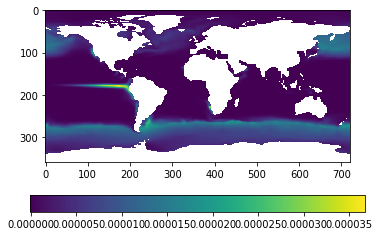

Silicic acid flux


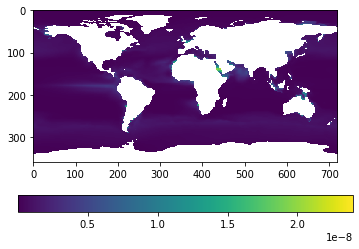

Phosphate flux


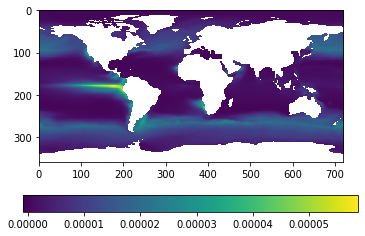

Dissolved inorganic nitrate (DIN) flux


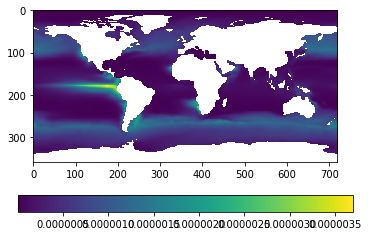

Iron flux


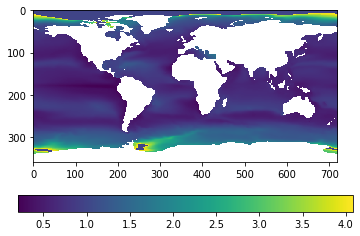

Prokaryote surface biomass


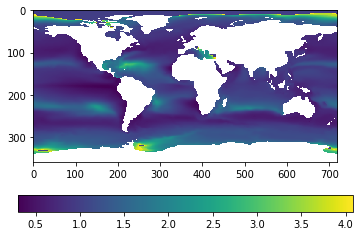

Picoeukaryote surface biomass


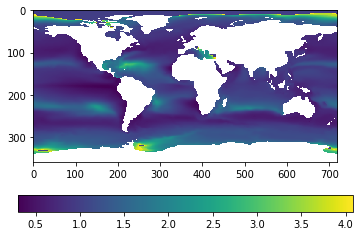

Coccolithophore surface biomass


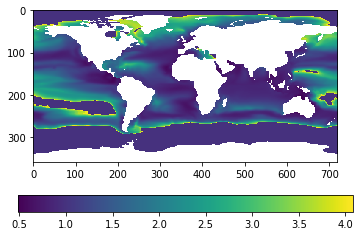

Diazotroph surface biomass


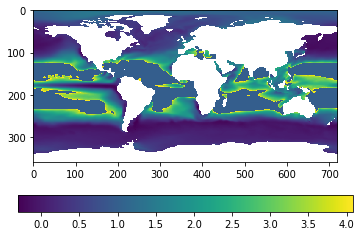

Diatom surface biomass


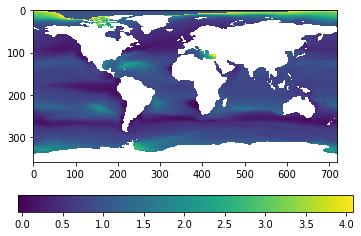

Mixotroph surface biomass


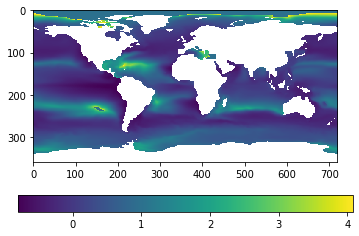

Zooplankton surface biomass


In [15]:
# Get list of field names and plot fields
fns=list(f.variables.keys())
for fn in fns:
 plt.imshow(np.flipud(f[fn][:,:]))
 plt.colorbar(orientation='horizontal')
 plt.show()
 print(f[fn].standard_name)

In [38]:
# Normalize fields to be in range 0-1 and remove
# points in land and build 11-dim vector of values
N=np.count_nonzero(~np.isnan(f[fns[0]][:]))
lv=N
lv=100000
V11 = np.zeros((lv,len(fns)))
i=0

for fn in fns:
 from sklearn import preprocessing
 from sklearn.manifold import TSNE

 scaler = preprocessing.MinMaxScaler()

 df=f[fn][:]
 data=np.array(df).reshape(-1,1)
 scaler.fit(data)
 dfs=scaler.transform(data)
 dfs=data
 dfsv=dfs[~np.isnan(dfs)]
 V11[:,i]=dfsv[0:lv]
 print(fn)
 i=i+1
np.shape(V11)

SI
P
N
FE
Prokaryote
Picoeukaryote
Coccolithophore
Diazotroph
Diatom
Mixotroph
Zooplankton


(100000, 11)

In [22]:
# Apply some CPU TSNE
tsne = TSNE(n_components=3, verbose=0, perplexity=400, n_iter=300)
tsne_results = tsne.fit_transform(V11)

In [18]:
D = tsne_results
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
ax.scatter(D[:,0], D[:,1], D[:,2],'o', c='k', s=1)

In [37]:
# Now apply some GPU TSNE - only supports 2 dimensions
from cuml.manifold import TSNE as TSNENV

174464

In [25]:
tsnenv = TSNENV(n_components=2, verbose=0, perplexity=400, n_iter=300)

In [39]:
tsne_resultsnv = tsnenv.fit_transform(V11)

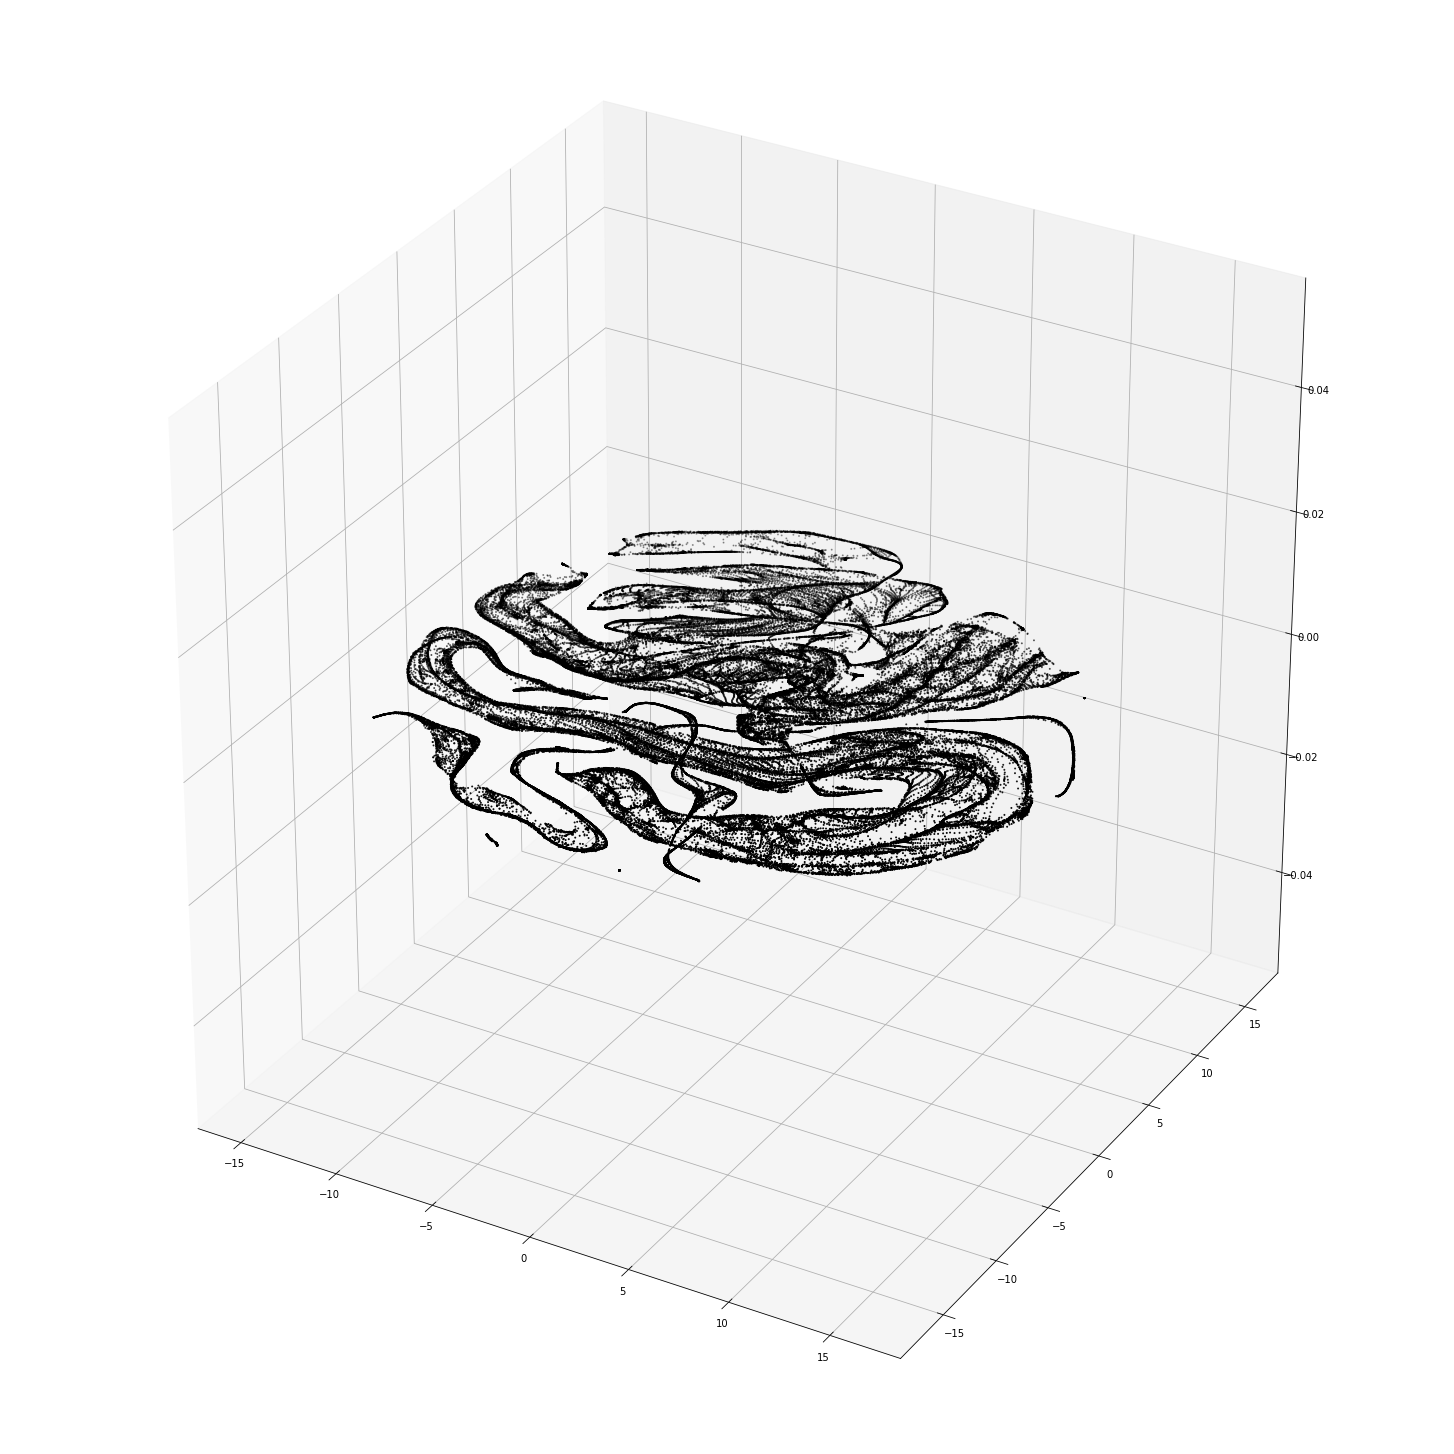

In [40]:
D = tsne_resultsnv
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
ax.scatter(D[:,0], D[:,1], D[:,1]*0,'o', c='k', s=1)

In [31]:
Data

array([[ -4.769031  ,   0.51641524],
       [ -4.9085135 ,   0.5257633 ],
       [ -5.040935  ,   0.5035562 ],
       ...,
       [ -1.5401005 , -12.775194  ],
       [ -1.5275683 , -12.790065  ],
       [ -1.523339  , -12.804677  ]], dtype=float32)